In [1]:
import pandas as pd
from joblib.numpy_pickle import pickle as pkl
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [2]:
PATH = './processed_dataset/'
x_train = pd.read_csv(PATH+'x_train_scaled.csv')
x_test = pd.read_csv(PATH+'x_test_scaled.csv')
y_train = pd.read_csv(PATH+'y_train.csv')
y_test = pd.read_csv(PATH+'y_test.csv')

In [3]:
f = open(f'freq_feat.data','rb')
data_best_feature= pkl.load(f)
f.close()

In [4]:
aa = [0.3805763347619777, 0.25149973620451965, 0.1536987782997354, 0.12656476852283813, 0.11992692222739584, 0.08492889695499996, 0.08009611766648037, 0.07677029881057751, 0.07518080616024071, 0.07434164925201261, 0.07296235197701534, 0.07298644501844578, 0.07158645912374184, 0.07116023787262182, 0.07091362385878466, 0.07066700984494749, 0.07066621455630609, 0.07041880525382752, 0.0694263539405617, 0.0688359951413284, 0.06853836742197335, 0.06834019288787493, 0.06894254491437311, 0.06714357178259348, 0.06644617396290353, 0.065946950677312, 0.06564590192581887, 0.0926543998571131, 0.06504380442283264, 0.06474275567133952, 0.06474275567133952, 0.06474275567133952, 0.06474275567133952, 0.06528856966578592, 0.06528856966578592, 0.06528856966578592, 0.06528856966578592, 0.06528856966578592, 0.06528856966578592, 0.06528856966578592, 0.06468966870906709, 0.06566296453547447, 0.06433553299530152, 0.0642887958694196, 0.06422935907075664, 0.06417627210848419, 0.06412318514621174, 0.09131188003718747, 0.06379084176089249, 0.06394397875804007]

<AxesSubplot:>

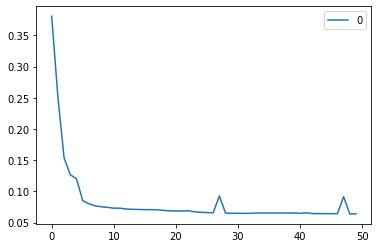

In [6]:
aaa = pd.DataFrame(aa)
aaa.plot()

![alt text](score_kernel_by_num_feat.png "Scores")

In [4]:
# [best_num - 5, 0 (linear)]
feat = data_best_feature.iloc[2,0]
x_train = x_train[feat]
x_test  = x_test[feat]

In [5]:
scores = cross_val_score(
    svm.SVR(kernel='linear'),
    x_train,
    y_train.values.ravel(), 
    cv=10, 
    scoring='r2'
    )
print("R2-Score: ", (scores.mean()))

R2-Score:  0.2776663029961378


In [6]:
f = open(f'cross_val_linear.data','wb')
pkl.dump((scores.mean()),f)
f.close()